In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Markdown


In [2]:
file_path = "bank.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

categorical_columns = df.columns[df.dtypes == 'object']
binary_category_columns = [col for col in categorical_columns if df[col].nunique() == 2]
n_category_columns = [col for col in categorical_columns if df[col].nunique() > 2]
numerical_columns = df.columns[df.dtypes != 'object'].drop('deposit')

df = pd.get_dummies(df, columns=binary_category_columns, drop_first=True)
df = pd.get_dummies(df, columns=n_category_columns)

df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

X = df.drop('deposit', axis=1)
y = df['deposit']

In [6]:
model = RandomForestClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
important_features = important_features.sort_values(by='Importance', ascending=False)
print(important_features)
print(important_features.count())

#maintain only the top 40 features
important_features = important_features.head(40)
X = X[important_features['Feature']]

                Feature  Importance
3              duration    0.326941
1               balance    0.078355
0                   age    0.078348
2                   day    0.066812
4              campaign    0.034753
46     poutcome_success    0.031945
5                 pdays    0.029882
31      contact_unknown    0.028073
8           housing_yes    0.026255
6              previous    0.019314
47     poutcome_unknown    0.015502
29     contact_cellular    0.014719
40            month_may    0.013379
39            month_mar    0.012981
32            month_apr    0.011936
38            month_jun    0.011287
42            month_oct    0.010762
9              loan_yes    0.010237
33            month_aug    0.010025
26  education_secondary    0.009750
27   education_tertiary    0.009699
23      marital_married    0.009567
37            month_jul    0.008968
35            month_feb    0.008798
41            month_nov    0.008469
24       marital_single    0.008468
14       job_management    0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## KNeighborsClassifier

C:\Users\migue\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The **best parameters** found after GridSearchCV were the following: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

The **best accuracy** score during cross validation was: 0.81890212364228.

GridSearchCV has already refitted the tuned Model KNeighborsClassifier(n_neighbors=11, weights='distance') using the best found parameters on the training dataset.

The results on the training dataset were as follows:

- **Accuracy**: 0.8298253470667264

- **Classification Report**:


              precision    recall  f1-score   support

           0      0.827     0.856     0.841      1175
           1      0.834     0.801     0.817      1058

    accuracy                          0.830      2233
   macro avg      0.830     0.828     0.829      2233
weighted avg      0.830     0.830     0.830      2233



- **Confusion Matrix**:


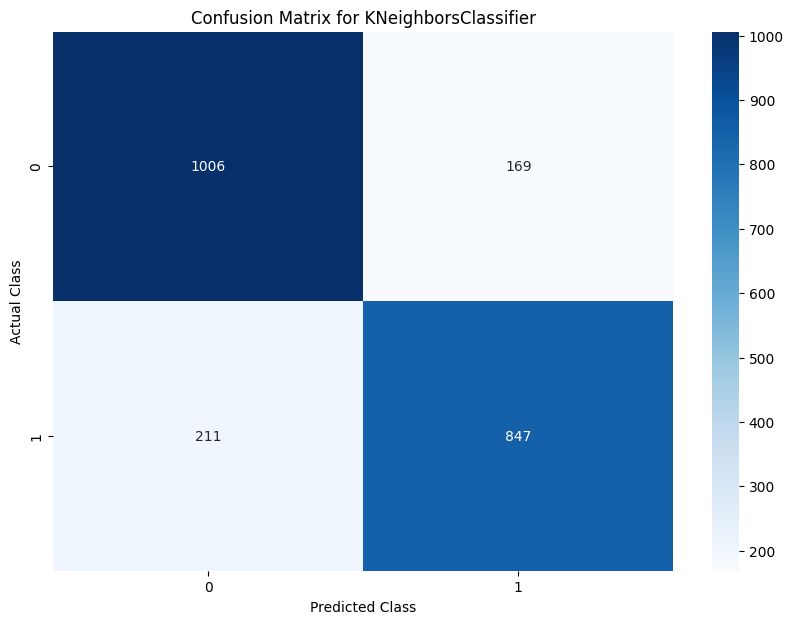

## LogisticRegression

The **best parameters** found after GridSearchCV were the following: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

The **best accuracy** score during cross validation was: 0.8289835240711263.

GridSearchCV has already refitted the tuned Model LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,
                   solver='liblinear') using the best found parameters on the training dataset.

The results on the training dataset were as follows:

- **Accuracy**: 0.8298253470667264

- **Classification Report**:


              precision    recall  f1-score   support

           0      0.839     0.837     0.838      1175
           1      0.820     0.821     0.821      1058

    accuracy                          0.830      2233
   macro avg      0.829     0.829     0.829      2233
weighted avg      0.830     0.830     0.830      2233



- **Confusion Matrix**:


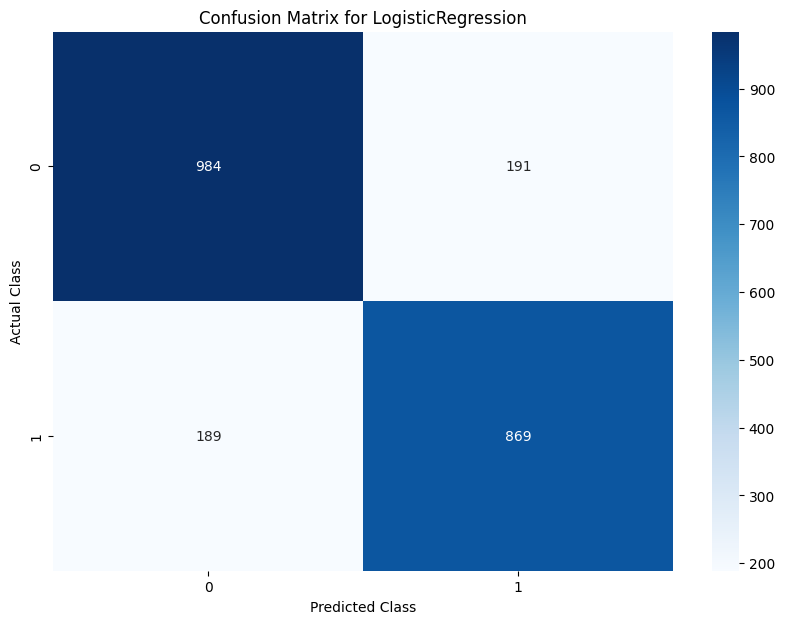

## RandomForestClassifier

The **best parameters** found after GridSearchCV were the following: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 400}

The **best accuracy** score during cross validation was: 0.8546290530734814.

GridSearchCV has already refitted the tuned Model RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=400,
                       random_state=42) using the best found parameters on the training dataset.

The results on the training dataset were as follows:

- **Accuracy**: 0.8580385132109271

- **Classification Report**:


              precision    recall  f1-score   support

           0      0.895     0.827     0.860      1175
           1      0.823     0.892     0.856      1058

    accuracy                          0.858      2233
   macro avg      0.859     0.860     0.858      2233
weighted avg      0.861     0.858     0.858      2233



- **Confusion Matrix**:


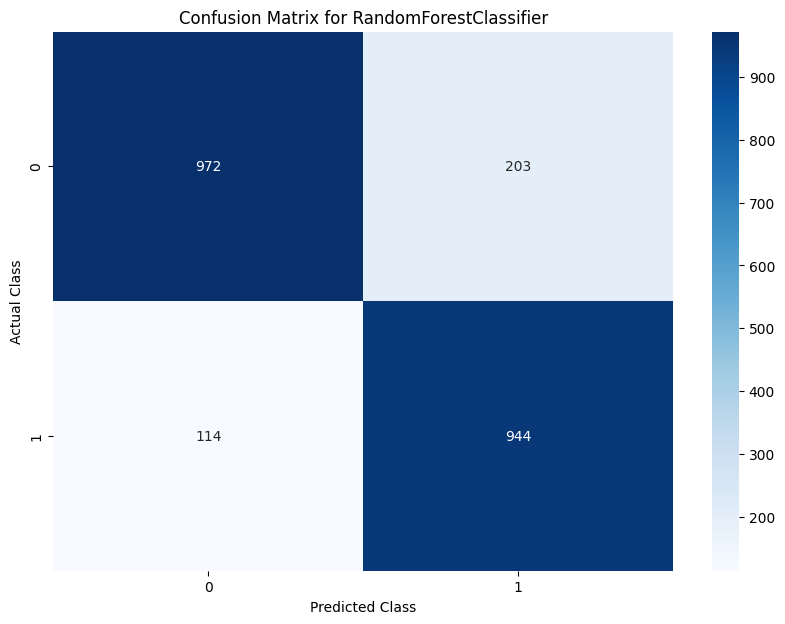

## SVC

The **best parameters** found after GridSearchCV were the following: {'C': 100, 'gamma': 0.01}

The **best accuracy** score during cross validation was: 0.8520544163914165.

GridSearchCV has already refitted the tuned Model SVC(C=100, gamma=0.01) using the best found parameters on the training dataset.

The results on the training dataset were as follows:

- **Accuracy**: 0.8607254814151366

- **Classification Report**:


              precision    recall  f1-score   support

           0      0.889     0.840     0.864      1175
           1      0.833     0.884     0.857      1058

    accuracy                          0.861      2233
   macro avg      0.861     0.862     0.861      2233
weighted avg      0.862     0.861     0.861      2233



- **Confusion Matrix**:


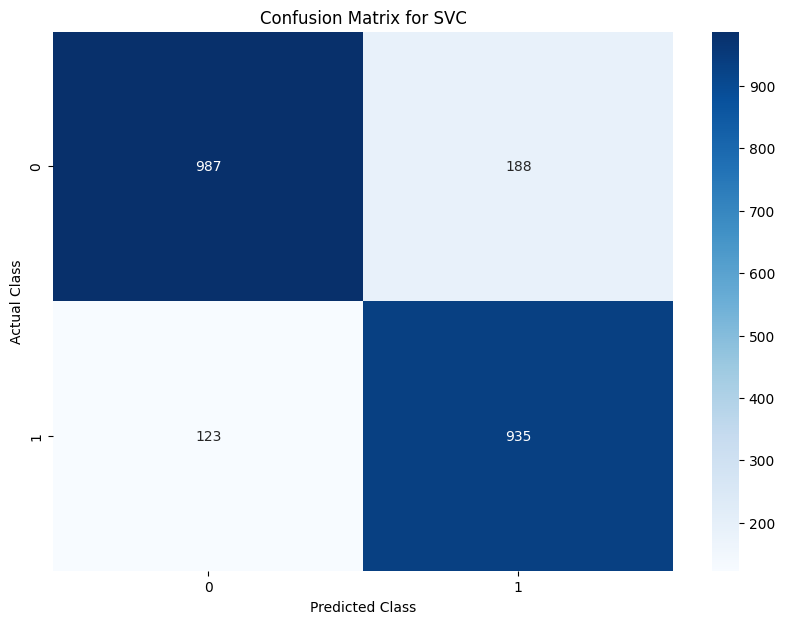

In [8]:

model_attributes = [
  # [model, param_grid, cv]
  [
    KNeighborsClassifier(),
    {'n_neighbors': list(range(1, 20)),'weights': ['uniform', 'distance'],'p': [1, 2],'metric' : ['minkowski','euclidean','manhattan']},
    10
  ], [
    LogisticRegression(class_weight='balanced', max_iter=10000),
    {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2']},
    10
  ], [
    RandomForestClassifier(random_state=42),
    {'n_estimators': [100, 200, 400], 'max_depth': [10, 15, 20, 30, None], 'min_samples_leaf': [1, 2, 4]},
    10
  ], [
    SVC(),
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
    5
  ]
]

for model, param_grid, cv in model_attributes:
  display(Markdown(f"## {model.__class__.__name__}"))
  grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  tuned_model = grid_search.best_estimator_
  display(Markdown(f"The **best parameters** found after GridSearchCV were the following: {grid_search.best_params_}"))
  display(Markdown(f"The **best accuracy** score during cross validation was: {grid_search.best_score_}."))
  display(Markdown(f"GridSearchCV has already refitted the tuned Model {tuned_model} using the best found parameters on the training dataset."))
  # GridSearchCV has refit=True by default, which refits the estimator using the best found parameters on the whole dataset.

  display(Markdown("The results on the training dataset were as follows:"))
  y_pred_test = tuned_model.predict(X_test)
  display(Markdown(f"- **Accuracy**: {accuracy_score(y_test, y_pred_test)}"))
  display(Markdown("- **Classification Report**:\n"))
  print(classification_report(y_test, y_pred_test, digits=3))
  display(Markdown("- **Confusion Matrix**:\n"))

  plt.figure(figsize=(10, 7))
  sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Class')
  plt.ylabel('Actual Class')
  plt.title(f'Confusion Matrix for {model.__class__.__name__}')
  plt.show()
